In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
data = pd.read_excel('titanic.xlsm')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data['Age'].isnull().sum()

177

## If Feature is following Gaussian Distribution

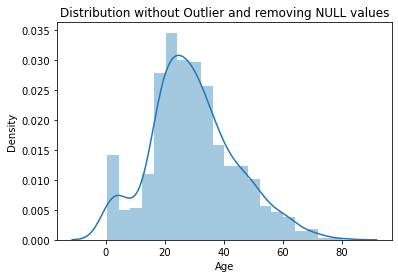

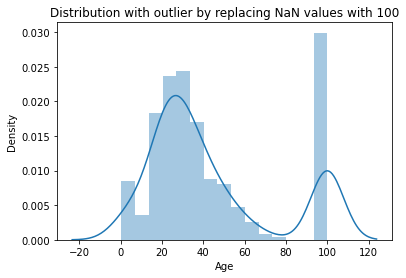

In [35]:
# Displaying Age feature distribution without outlier and removing NaN values
sns.distplot(data['Age'].dropna())
plt.title('Distribution without Outlier and removing NULL values')
plt.show()

# Displaying Age feature distribution with outlier by replacing NaN values with 100
sns.distplot(data['Age'].fillna(100))
plt.title('Distribution with outlier by replacing NaN values with 100')
plt.show()

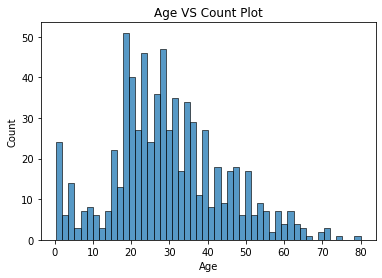

In [36]:
# Plotting Histogram for Age feature
sns.histplot(data['Age'], bins= 50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age VS Count Plot')
plt.show()

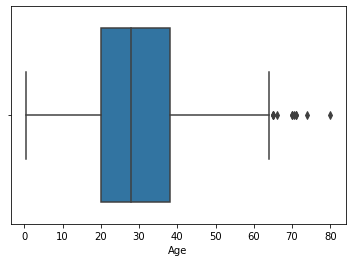

In [37]:
# Using Box Plot to find the outliers in the dataset
sns.boxplot(data = data, x = 'Age')
plt.show()

In [38]:
# Description of Data
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
# Assuming Age is following Gaussian Distribution, we will evaluate the boundary values for Outlier determination
upper = (data['Age'].mean()) + (3 * data['Age'].std())
lower = (data['Age'].mean()) - (3 * data['Age'].std())

print(f" Upper Limit : {upper}\n Lower Limit : {lower}\n Mean : {data['Age'].mean()}")

 Upper Limit : 73.27860964406095
 Lower Limit : -13.88037434994331
 Mean : 29.69911764705882


## If Feature is Skewed

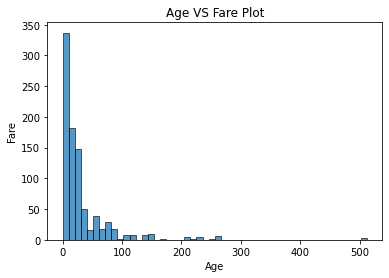

In [40]:
# Plotting Histogram for Age feature
sns.histplot(data['Fare'], bins= 50)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age VS Fare Plot')
plt.show()

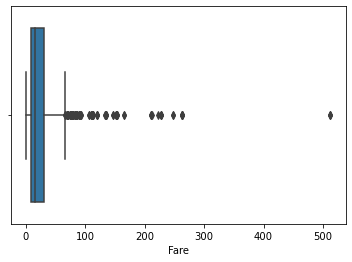

In [41]:
# Using Box Plot to find the outliers in the dataset
sns.boxplot(data = data, x = 'Fare')
plt.show()

In [42]:
# Description of Data
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [43]:
# Evaluating the IQR and Upper and Lower boundaries based on quantile value
# Extreme Outliers
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
upper_boundary = data['Fare'].quantile(0.75) + (1.5 * IQR)
lower_boundary = data['Fare'].quantile(0.25) - (1.5 * IQR)

print(f" Upper Boundary : {upper_boundary}\n Lower Boundary : {lower_boundary}")

 Upper Boundary : 65.6344
 Lower Boundary : -26.724


In [44]:
# Removing Outliers for Age columns
# First for Age column we will replace all the values greate than upper limit as 73

df = data.copy()
df.loc[df['Age'] > upper, 'Age'] = 73
df[df['Age'] == 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,73.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,73.0,0,0,347060,7.775,NaN,S


In [45]:
# Removing Outliers for Fare columns
# First for Fare column we will replace all the values greate than upper boundary as 100

df.loc[df['Fare'] > upper_boundary, 'Fare'] = 100
df[df['Fare'] == 100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,100.0,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,100.0,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,100.0,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,100.0,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,100.0,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,100.0,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,100.0,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,100.0,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,100.0,NaN,S
